# Analyzing Earthquake Data With Pandas

## Introduction

In this challenge, you'll be analyzing a dataset from an earthquake that originated off the coast of Illapel, Chile, in September of 2015. Specifically, you'll be focusing on one type of seismic waves—P waves, which stands for <em>primary</em> waves—which are the first waves to arrive at a seismograph after an earthquake. You'll plot travel time curves that show the times when P-wave signals arrived at seismographs at various distances from the origin of the earthquake. A comparison of actual observed P-wave arrival times to theoretical arrival times computed from a couple of different models can help us infer some things about the composition of the Earth.

Throughout the rest of this challenge, we'll lead you through the steps that you should perform to analyze the Illapel earthquake dataset. Look for the instructions in <font color=blue><strong>blue</font> which indicate when there is a specific task you need to complete.


## The Data

The USGS hosts important information about this and other earthquakes on its web site. All information for this Chilean earthquake can be found [here](http://earthquake.usgs.gov/earthquakes/eventpage/us20003k7a#general_summary).
The specific type of data you'll be using here is the </em>arrival times</em> of seismic waves from the earthquake at seismic stations worldwide. 

<br>

<font color=blue><strong>Your Turn: Download the data</font>

Visit [this page](http://earthquake.usgs.gov/earthquakes/eventpage/us20003k7a#origin) and click on the "Phases" tab, then click the "Download" button. A window will pop up allowing you to manually "Copy" the data, which you'll then need to paste into a new data file (you can use a spreadsheet application, such as Excel, or just paste it into a simple text file with vi or your text editor of choice). With your data saved to a file, you're ready to begin working.

## Loading The DataFrame
Let's begin by reading in the data from the file to a new DataFrame. We'll simply load the entire dataset, and then we can look at its contents. How you load in the DataFrame will depend on how you saved the original data. Is it in an Excel spreadsheet? a simple data file?

<br>
<font color=blue><strong>Your Turn: Complete the following in the cell below</font>

Depending on which file format you chose, use one of pandas' built-in <em>read</em> methods to load the data into a new DataFrame. 
You should have a number of columns, including <em>Channel</em>, <em>Distance</em>, <em>Azimuth</em>, etc.


In [3]:
import pandas as pd
df= pd.read_csv('Earthquake_data.txt', header=None, comment='#', sep='\t', 
                names=['Channel','Distance', 'Azimuth', 'Phase',' Arrival Time', 'Status','Residual','Weight'])
df

,Channel,Distance,Azimuth,Phase,Arrival Time,Status,Residual,Weight
0,C1 CO02 BHZ --,0.683970,57.61970,Pn,2015-09-16T22:54:46.05Z,manual,-1.2,1.30
1,C1 CO06 BHZ --,0.896914,2.16908,Pn,2015-09-16T22:54:49.07Z,manual,-1.0,1.27
2,C1 CO03 BHZ --,1.117200,49.34070,Pn,2015-09-16T22:54:52.74Z,manual,-0.4,1.23
3,C1 VA01 BHZ --,1.446140,178.76800,Pn,2015-09-16T22:54:56.84Z,manual,-0.7,1.19
4,C1 VA03 BHZ --,1.522400,141.54800,Pn,2015-09-16T22:54:58.76Z,manual,0.0,1.18
5,C GO04 BHZ --,1.585610,28.55430,Pn,2015-09-16T22:55:00.16Z,manual,0.4,1.17
6,C1 MT05 BHZ --,1.978890,156.67900,Pn,2015-09-16T22:55:05.06Z,manual,0.1,1.12
7,C1 VA05 BHZ --,2.078920,178.61800,Pn,2015-09-16T22:55:05.35Z,manual,-0.9,1.11
8,C1 MT09 BHZ --,2.271910,165.43700,Pn,2015-09-16T22:55:09.12Z,manual,0.1,1.08
9,C1 MT01 BHZ --,2.312490,171.23300,Pn,2015-09-16T22:55:08.83Z,manual,-0.7,1.08


Looking at the output, we see that our DataFrame has almost 400 rows (observations) and 8 columns of data corresponding to the observations. We'll be working with five of these columns, each described below:

- <strong>Distance:</strong> Angular distance (following a path on the Earth's surface) between the epicenter and different seismic stations in degrees

- <strong>Phase:</strong> Denotes the type of wave (i.e., different types of P-waves, S-waves, etc.)

- <strong>Residual:</strong> The differences between observed travel times and theoretical travel times computed from a detailed Earth model

- <strong>Arrival Time:</strong> The exact time (in date-time format) when the signal was detected at the seismograph

- <strong>Azimuth:</strong> The angle between the epicenter of the Earthquake and the seismic station where the observation was made, in units of degrees

Let's take a few moments to try to absorb the meaning of this data. In the diagram shown on the opening page of the Canvas course, the <em>epicenter</em> is the point on the upper left surface of the globe where the earthquake is shown to originate, and the seismic station is shown roughly 90 degrees eastward (clockwise around the globe) from the epicenter. This angle is the <em>azimuth</em>: small azimuth angles signify observations made at a seismic station near and to the east of the earthquake; an angle of 180 degrees means one that passes directly through to be observed on the opposite side of the Earth; and azimuth angles between 180 and 360 signify observations made westward of the earthquake. You'll notice that seismic waves observed at different angles follow very different paths through earth, from hardly penetrating Earth's mantle to going through all the different Earth layers. 

Different kinds of seismic waves travel at different speeds through Earth, and the speed of any given type of wave is also influenced by the Earth's structure. Thus, by studying the arrival times of different types of waves at different locations, we can learn about the structure of the Earth.

## Parsing The Data
So, with a basic understanding of the meaning of this data, let's dive in. This dataset, like most datasets, will require a bit of parsing to get it into a format that will work for our purposes.

### Extracting the Time and Getting the Right Units
The date and time are currently represented together in the <em>Arrival Time</em> column. If we want to plot the travel time curves in seconds since the start of the earthquake, we'll have to parse the date-time format to separate the date and time, and then compute the time in seconds relative to the origin time of the Earthquake, which is 22:54:32.86 (hours:minutes:seconds).

While you could do these things manually, you don't have to, because pandas has convenient built-in methods to do just this (as you'll see below).

<font color=blue><strong>Your Turn: Complete the following in the cell below (relates to Question 1 of the quiz)</strong></font>
1. Review the official documentation to learn how to use the [parse_dates](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) parameter to re-read in the original data file and parse the <em>Arrival Time</em> column. Confirm that the date and time are split, and that Python recognizes it as a the "datetime" data type (enter <code>df['Arrival Time']</code>, and scroll down to the bottom of the output to see the data type).

2. Make sure that your DataFrame is sorted by the Arrival Time (refer [here](https://pandas.pydata.org/pandas-docs/version/0.18.1/generated/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values) if you need help with the sorting). You'll notice that all the observations occurred on the same date (2015-09-16), so we can ignore the date when we compute the relative arrival times. 

    3. Create a new column, <code>'Relative Arrival Time'</code>, that contains the arrival times <em>relative to the origin time of the Earthquake</em>: 22:54:32.86. <strong>We have started this for you in the cell below</strong> using the nifty <code>Timestamp</code> method, which you can learn about [here](https://pandas.pydata.org/pandas-docs/stable/timeseries.html). (Note: Since all observations occurred on the same date, we can ignore the date when we compute the relative arrival times.)
    
    4. Next, convert the new relative time column to seconds using another nifty method, <code>total_seconds</code>, which when used as follows, will return the column 'X' in units of seconds (go [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.total_seconds.html) for a reference):
    <code>df['X'].dt.total_seconds()</code>

In [18]:
import pandas as pd

df = pd.read_csv('Earthquake_data.txt', header=None, comment='#', sep='\t', 
                 names=['Channel','Distance', 'Azimuth', 'Phase', 'Arrival Time', 'Status','Residual','Weight'],
                 parse_dates=['Arrival Time'])
df = df.sort_values('Arrival Time')

# Get Relative arrival time in seconds
df.loc[:,'Relative Arrival Time'] = df['Arrival Time'] - pd.Timestamp('2015-09-16 22:54:32.86')
df.loc[:, 'X'] = df['Relative Arrival Time'].dt.total_seconds()
df

,Channel,Distance,Azimuth,Phase,Arrival Time,Status,Residual,Weight,Relative Arrival Time,X
0,C1 CO02 BHZ --,0.683970,57.61970,Pn,2015-09-16 22:54:46.050,manual,-1.2,1.30,00:00:13.190000,13.19
1,C1 CO06 BHZ --,0.896914,2.16908,Pn,2015-09-16 22:54:49.070,manual,-1.0,1.27,00:00:16.210000,16.21
2,C1 CO03 BHZ --,1.117200,49.34070,Pn,2015-09-16 22:54:52.740,manual,-0.4,1.23,00:00:19.880000,19.88
3,C1 VA01 BHZ --,1.446140,178.76800,Pn,2015-09-16 22:54:56.840,manual,-0.7,1.19,00:00:23.980000,23.98
4,C1 VA03 BHZ --,1.522400,141.54800,Pn,2015-09-16 22:54:58.760,manual,0.0,1.18,00:00:25.900000,25.90
5,C GO04 BHZ --,1.585610,28.55430,Pn,2015-09-16 22:55:00.160,manual,0.4,1.17,00:00:27.300000,27.30
6,C1 MT05 BHZ --,1.978890,156.67900,Pn,2015-09-16 22:55:05.060,manual,0.1,1.12,00:00:32.200000,32.20
7,C1 VA05 BHZ --,2.078920,178.61800,Pn,2015-09-16 22:55:05.350,manual,-0.9,1.11,00:00:32.490000,32.49
9,C1 MT01 BHZ --,2.312490,171.23300,Pn,2015-09-16 22:55:08.830,manual,-0.7,1.08,00:00:35.970000,35.97
8,C1 MT09 BHZ --,2.271910,165.43700,Pn,2015-09-16 22:55:09.120,manual,0.1,1.08,00:00:36.260000,36.26


### Selecting P-Waves
For this exercise, we are focusing only on P waves, so our next step is to isolate all observations with <em>P</em> or <em>Pn</em> in the 'Phase' column.

<br>

<font color=blue><strong>Your Turn: Complete the following in the cell below (relates to Question 2 of the quiz):</strong></font>

1. Select all rows of data with observations of P waves so that this slice of the DataFrame can be used in the calculations that follow. How many P wave observations are there in the sample?</font>


In [36]:
df2= df.loc[(df['Phase'] == 'P') | (df['Phase'] == 'Pn')]
df2

,Channel,Distance,Azimuth,Phase,Arrival Time,Status,Residual,Weight,Relative Arrival Time,X
0,C1 CO02 BHZ --,0.683970,57.61970,Pn,2015-09-16 22:54:46.050,manual,-1.2,1.30,00:00:13.190000,13.19
1,C1 CO06 BHZ --,0.896914,2.16908,Pn,2015-09-16 22:54:49.070,manual,-1.0,1.27,00:00:16.210000,16.21
2,C1 CO03 BHZ --,1.117200,49.34070,Pn,2015-09-16 22:54:52.740,manual,-0.4,1.23,00:00:19.880000,19.88
3,C1 VA01 BHZ --,1.446140,178.76800,Pn,2015-09-16 22:54:56.840,manual,-0.7,1.19,00:00:23.980000,23.98
4,C1 VA03 BHZ --,1.522400,141.54800,Pn,2015-09-16 22:54:58.760,manual,0.0,1.18,00:00:25.900000,25.90
5,C GO04 BHZ --,1.585610,28.55430,Pn,2015-09-16 22:55:00.160,manual,0.4,1.17,00:00:27.300000,27.30
6,C1 MT05 BHZ --,1.978890,156.67900,Pn,2015-09-16 22:55:05.060,manual,0.1,1.12,00:00:32.200000,32.20
7,C1 VA05 BHZ --,2.078920,178.61800,Pn,2015-09-16 22:55:05.350,manual,-0.9,1.11,00:00:32.490000,32.49
9,C1 MT01 BHZ --,2.312490,171.23300,Pn,2015-09-16 22:55:08.830,manual,-0.7,1.08,00:00:35.970000,35.97
8,C1 MT09 BHZ --,2.271910,165.43700,Pn,2015-09-16 22:55:09.120,manual,0.1,1.08,00:00:36.260000,36.26


## Analyze The Data
Now that we have the isolated the data we want to work with and got it into a format that we can work with, let's start analyzing this dataset. We want to visualize the data, and compare it to a simple theoretical model for the propogation of P waves.

Let's consider the Earth as a homogeneous sphere with an average P-wave velocity <em>v</em> of 11 km/s.  The following formulas represents the theoretical travel time along the <em>shortest path</em> (i.e., straight line) between quake and seismograph station, called a chord:
$$ t\:=\frac{2R\sin\left(\frac{\theta}{2}\right)}{v} $$
where R is the radius of the Earth (6371 km) and $\theta$ is the angular distance (that's our 'Distance' column) between the epicenter and the seismic station.

<br>

<font color=blue><strong>Your Turn: Complete the following in the cell below</strong></font>

1. Write code to calculate the theoretical travel times as a function of Distance using the chord approximation equation above. Add the 'Chord Times' to your DataFrame as a new column, computing the theoretical times for each 'Distance' from the original dataset. Tips: Be sure that you understand the units of all the inputs! Does the <em>sin</em> function expect the angle to be in degrees or radians? <em>Hint: You should find that for the first observation (Distance=0.683970 degrees), the chord travel time is 6.913958 seconds.</em></font>

2. <font color=blue>(Relates to Question 3 AND 4 of the quiz)</font> Now plot the observed and theoretical values of <em>P wave travel time [seconds]</em> as a function of <em>Distance [degrees]</em>, labeling each axis appropriately and using different colors for the two different curves. What does the plot indicate about how well the chord (shortest path) approximation matches to the observations (qualitatively)?



In [51]:
# FILL IN CODE BELOW
# If you need to use numpy, don't forget to import it!
import numpy as np

# Set constants R and v
R = 6371.  # Earth's radius in km
v = 11.   # Assumed constant P-wave velocity in km/s
A = 2.*R/v  # Just a constant

# Compute the chord times and add to the DataFrame (hint: use df.loc)
rad = df2['Distance']* (np.pi/180)  # Convert degrees to radians

df2.loc[:, 'Chord Times']= A*np.sin(rad/2)
df2


,Channel,Distance,Azimuth,Phase,Arrival Time,Status,Residual,Weight,Relative Arrival Time,X,Chord Times
0,C1 CO02 BHZ --,0.683970,57.61970,Pn,2015-09-16 22:54:46.050,manual,-1.2,1.30,00:00:13.190000,13.19,6.913958
1,C1 CO06 BHZ --,0.896914,2.16908,Pn,2015-09-16 22:54:49.070,manual,-1.0,1.27,00:00:16.210000,16.21,9.066479
2,C1 CO03 BHZ --,1.117200,49.34070,Pn,2015-09-16 22:54:52.740,manual,-0.4,1.23,00:00:19.880000,19.88,11.293182
3,C1 VA01 BHZ --,1.446140,178.76800,Pn,2015-09-16 22:54:56.840,manual,-0.7,1.19,00:00:23.980000,23.98,14.618106
4,C1 VA03 BHZ --,1.522400,141.54800,Pn,2015-09-16 22:54:58.760,manual,0.0,1.18,00:00:25.900000,25.90,15.388925
5,C GO04 BHZ --,1.585610,28.55430,Pn,2015-09-16 22:55:00.160,manual,0.4,1.17,00:00:27.300000,27.30,16.027833
6,C1 MT05 BHZ --,1.978890,156.67900,Pn,2015-09-16 22:55:05.060,manual,0.1,1.12,00:00:32.200000,32.20,20.002872
7,C1 VA05 BHZ --,2.078920,178.61800,Pn,2015-09-16 22:55:05.350,manual,-0.9,1.11,00:00:32.490000,32.49,21.013880
9,C1 MT01 BHZ --,2.312490,171.23300,Pn,2015-09-16 22:55:08.830,manual,-0.7,1.08,00:00:35.970000,35.97,23.374518
8,C1 MT09 BHZ --,2.271910,165.43700,Pn,2015-09-16 22:55:09.120,manual,0.1,1.08,00:00:36.260000,36.26,22.964392


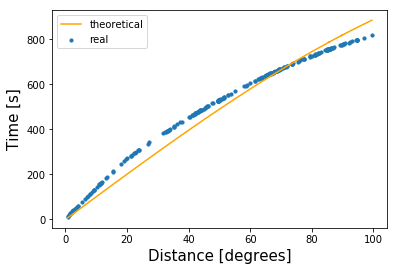

In [63]:
# Plot P-wave arrival time versus Distance, for both 
# the observations (just points) and for the model (connecting lines)
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df2['Distance'], df2['X'], s=10, label='real')
plt.plot(df2['Distance'], df2['Chord Times'], color='orange', label='theoretical')
plt.xlabel('Distance [degrees]', fontsize=15)
plt.ylabel('Time [s]', fontsize=15)
plt.legend()

By studying the plot you created above, we can infer that the speed with which P waves travel <em>increases</em> with depth within the Earth’s mantle (think about how Distance in degrees relates to depth within the Earth's mantle).

### Finding a Better Fit to the Data

In the last part of the challenge, you plotted the chord travel times and compared that approximation to the observed travel times; it turns out, the straight line path does not match the actual shape of the data very well.

Let's first try playing with the chord travel times to see if we can find a better fit to at least some part of the dataset, and then we'll actually find a best fit curve for the data.


<br>

<font color=blue><strong>Your Turn: Complete the following in the cell below (relates to Questions 5 AND 6 in the quiz)</strong></font>

1. Next, let's try finding a best fit curve for the data. Read up on how to use NumPy's [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) function. This page will show you how to compute the best fit line using <code>numpy.polyfit</code>, and then how to use <code>numpy.poly1d</code> to automatically generate a function using those best fit parameters so you can easily visualize those results.
    2. <font color=blue>(See Question 5 in the quiz)</font> Try plotting the best fit curves for deg=0 through deg=4 (5 different fits). How does the fit improve as you increase the degree of the fit?
    3. <font color=blue>(See Question 6 in the quiz)</font> For deg=3, what is the best fit coefficient for the x**3 term?

poly1d([  3.13873460e-04,  -9.39025103e-02,   1.44952491e+01,
         5.37974347e+00])

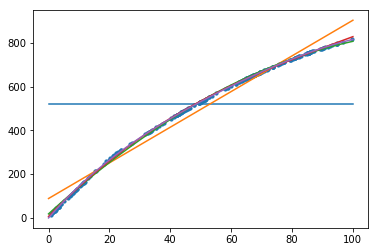

In [67]:
# FILL IN CODE BELOW

# Find the best fit curve
fit0 = np.polyfit(df2['Distance'], df2['X'], 0)
p0 = np.poly1d(fit0)

fit1 = np.polyfit(df2['Distance'], df2['X'], 1)
p1 = np.poly1d(fit1)

fit2 = np.polyfit(df2['Distance'], df2['X'], 2)
p2 = np.poly1d(fit2)

fit3 = np.polyfit(df2['Distance'], df2['X'], 3)
p3 = np.poly1d(fit3)

fit4 = np.polyfit(df2['Distance'], df2['X'], 4)
p4 = np.poly1d(fit4)

# Plot the data
xp = np.linspace(0,100, 100)
plt.scatter(df2['Distance'], df2['X'], s=10, label='real')
plt.plot(xp, p0(xp))
plt.plot(xp, p1(xp))
plt.plot(xp, p2(xp))
plt.plot(xp, p3(xp))
plt.plot(xp, p4(xp))
p3


 ### Studying the Residuals

You'll notice that in the original USGS dataset there's a column called 'Residual'. The residual is the differences between the observed travel times and the theoretical travel times predicted a realistic. These differences are called <em>residual times</em> or <em>delay times</em>, and they are a measure of how well the data fit the model. 

$$\text{residual} = \text{(observed travel time) - (theoretical travel time)}$$

Let's see what we can learn by studying the USGS residuals as a function of 'Azimuth,' which is the angle between the earthquake and the seismic station where the observation was made, in units of degrees. We'll split the observations into <em>east</em> (azimuth of 0-180) and <em>west</em> (azimuth of 180-360) of the epicenter. Any differences in the distributions of the residuals could reveal something about the structure inside the Earth.

<br>

<font color=blue><strong>Your Turn: Complete the following in the cell below</strong></font>

1. Slice your DataFrame into east and west observations based on the azimuth angle. As a check, how many of the observations were traveling eastward versus westward? <font color=blue>(Relates to Question 7 in the quiz)</font>
2. <font color=blue>(Relates Question 8 in the quiz)</font> Make a 2-panel plot that contains the P wave travel time versus the distance (like before), except now plotting the east and west data in two different colors. On the second panel, plot the USGS residuals (P wave delay times) as separate histograms in different colors. We recommend using the attribute alpha=0.5, which makes them semi-transparent so you can see both histograms and their overlap. What does the plot show you about how the speeds of the waves in the two directions compare?


(100, 11)
(159, 11)


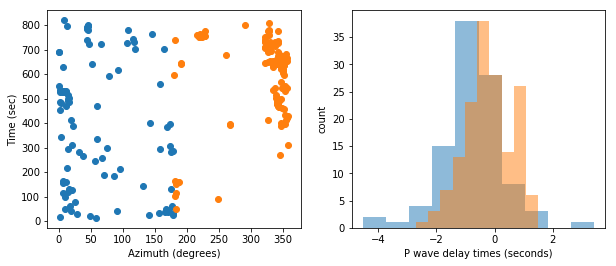

In [76]:
east = df2[df2['Azimuth'] < 180]
west = df2[df2['Azimuth'] >= 180]

print east.shape
print west.shape

# Plot the results (some parts are filled in for you below)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.scatter(east['Azimuth'], east['X'])
ax1.scatter(west['Azimuth'], west['X'])
ax1.set_xlabel('Azimuth (degrees)')
ax1.set_ylabel('Time (sec)')
ax2.hist(east['Residual'], alpha=0.5)
ax2.hist(west['Residual'], alpha=0.5)
ax2.set_xlabel('P wave delay times (seconds)')
ax2.set_ylabel('count')
# plt.show()